In [35]:
import pandas as pd
import numpy as np

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

import seaborn as sns

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

# Data Set information

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

## Attributes
1. Age - Age of the patient
2. Gender - Gender of the patient
3. TB - Total Bilirubin
4. DB - Direct Bilirubin
5. Alkphos - Alkaline Phosphotase
6. Sgpt - Alamine Aminotransferase
7. Sgot - Aspartate Aminotransferase
8. TP - Total Protiens
9. ALB - Albumin
10. A/G Ratio - Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts)

# Read the data

In [2]:
# dataset location
dataset_location = "./dataset/ilpd_dataset.csv"

# column names
names = ['Age', 'Gender', 'TB', 'DB', 'ALKPHOS', 'SGPT', 'SGOT', 'TP', 'ALB', 'AG Ratio', 'selector']

# read dataset to pandas dataframe
df = pd.read_csv(dataset_location, names=names);

# show first five cols of the dataset
print("Data shape: ", df.shape)
df.head()

Data shape:  (583, 11)


,Age,Gender,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       583 non-null    int64  
 1   Gender    583 non-null    object 
 2   TB        583 non-null    float64
 3   DB        583 non-null    float64
 4   ALKPHOS   583 non-null    int64  
 5   SGPT      583 non-null    int64  
 6   SGOT      583 non-null    int64  
 7   TP        583 non-null    float64
 8   ALB       583 non-null    float64
 9   AG Ratio  579 non-null    float64
 10  selector  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
df.describe()

,Age,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17761ad0>,
      dtype=object)

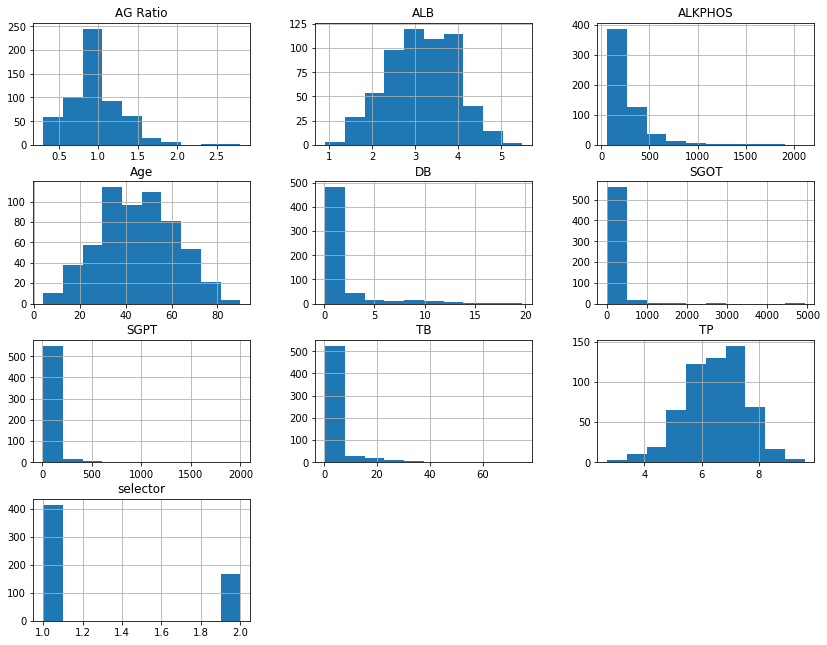

In [5]:
df.hist(figsize=(14,11))

Text(0, 0.5, 'Frequency')

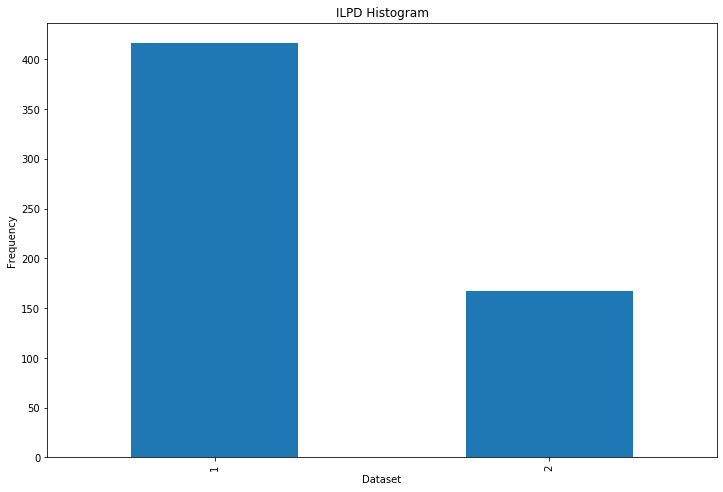

In [6]:
numb_of_classes = pd.value_counts(df['selector'], sort = True).sort_index()
numb_of_classes.plot(kind = 'bar')
plt.title("ILPD Histogram")
plt.xlabel("Dataset")
plt.ylabel("Frequency")

# Preprocessing

## change non-numerical values to integers

In [7]:
# check unique values
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
# one hot value encoding
df = pd.get_dummies(df)
names = df.columns

df.head()

,Age,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,selector,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


## remove empty values

In [9]:
# we can see that there are some null values in AG Ratio
df['AG Ratio'].fillna(value=0, inplace=True)

# check now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            583 non-null    int64  
 1   TB             583 non-null    float64
 2   DB             583 non-null    float64
 3   ALKPHOS        583 non-null    int64  
 4   SGPT           583 non-null    int64  
 5   SGOT           583 non-null    int64  
 6   TP             583 non-null    float64
 7   ALB            583 non-null    float64
 8   AG Ratio       583 non-null    float64
 9   selector       583 non-null    int64  
 10  Gender_Female  583 non-null    uint8  
 11  Gender_Male    583 non-null    uint8  
dtypes: float64(5), int64(5), uint8(2)
memory usage: 46.8 KB


## split data into training & testing set

In [10]:
# shuffle data
df = shuffle(df)

# split data into feture set X and labels y
X = df.drop('selector', axis=1)
y = df['selector']

# show first five cols of feature set
X.head()

,Age,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,Gender_Female,Gender_Male
421,26,1.0,0.3,163,48,71,7.1,3.7,1.0,0,1
174,31,0.6,0.1,175,48,34,6.0,3.7,1.6,0,1
370,54,22.6,11.4,558,30,37,7.8,3.4,0.8,1,0
334,13,0.7,0.2,350,17,24,7.4,4.0,1.1,1,0
550,46,3.3,1.5,172,25,41,5.6,2.4,0.7,0,1


In [11]:
# show unique labels
y.unique()

array([2, 1])

In [12]:
# set number of test samples
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

In [13]:
print("Number of test samples (X): ", X_test.shape[0])
print("Number of test samples (y): ", y_test.shape[0])

print("Number of train samples (X): ", X_train.shape[0])
print("Number of train samples (y): ", y_train.shape[0])

Number of test samples (X):  175
Number of test samples (y):  175
Number of train samples (X):  408
Number of train samples (y):  408


## feature scaling

In [14]:
# we can see that the ranges of particular features are very different
# we need to scale those features to fix that
scaler = StandardScaler()

X_train_before = X_train.copy(deep=True)

# fit only for training data
scaler.fit(X_train)

# transform training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# show train set
X_train = pd.DataFrame(X_train, columns=X_train_before.columns)
X_train.head()

,Age,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,Gender_Female,Gender_Male
0,-0.505662,-0.316605,-0.392205,-0.390339,-0.221902,-0.236735,-1.058547,-1.277579,-1.016207,-0.547141,0.547141
1,0.610198,-0.347456,-0.427820,-0.307683,-0.342376,-0.317535,-0.259249,-0.286605,-0.408983,-0.547141,0.547141
2,-0.195701,-0.393733,-0.463435,-0.671371,-0.294186,-0.264839,-1.413790,-0.534349,0.805464,-0.547141,0.547141
3,-1.125585,-0.409159,-0.463435,-0.191963,-0.342376,-0.289431,-1.058547,-1.029836,-0.712595,-0.547141,0.547141
4,-0.443670,-0.038942,0.035179,-0.150635,0.013022,1.056068,0.273616,0.952112,1.109076,-0.547141,0.547141


In [15]:
# show test set
X_test = pd.DataFrame(X_test, columns=X_train_before.columns)
X_test.head()

,Age,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,Gender_Female,Gender_Male
0,-1.249569,-0.409159,-0.463435,-0.431667,0.711769,1.038503,0.007183,0.952112,1.716300,-0.547141,0.547141
1,0.300237,-0.254902,-0.249743,0.171725,-0.252020,-0.184039,0.717670,0.332753,-0.105371,-0.547141,0.547141
2,0.920160,-0.193199,-0.178513,-0.406870,0.217827,0.497493,-2.213087,-1.896938,-1.016207,-0.547141,0.547141
3,0.920160,0.377551,0.533793,-0.134104,0.175661,-0.004873,0.095994,0.456625,0.562575,-0.547141,0.547141
4,-1.993476,-0.409159,-0.499050,-0.444066,-0.324305,-0.303483,2.138643,2.190829,0.805464,1.827683,-1.827683


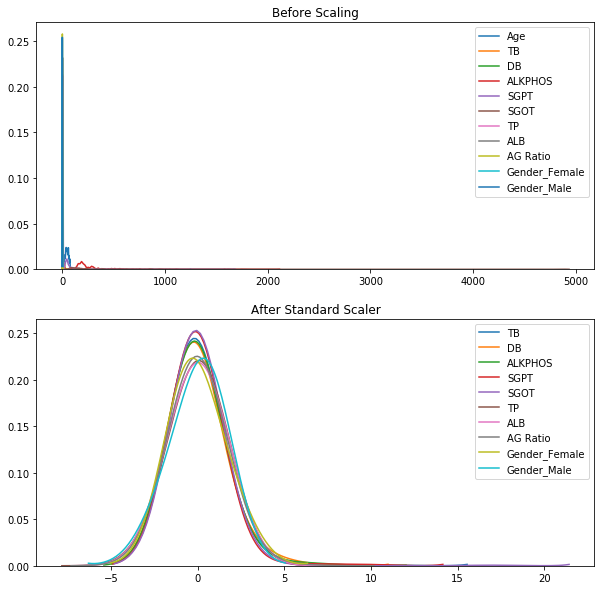

In [16]:
# show difference
labels = X_train_before.columns
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))
bw_value = 1.5

ax1.set_title('Before Scaling')
sns.kdeplot(X_train_before['Age'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['TB'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['DB'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['ALKPHOS'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['SGPT'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['SGOT'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['TP'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['ALB'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['AG Ratio'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['Gender_Female'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['Gender_Male'], ax=ax1, bw=bw_value)

ax2.set_title('After Standard Scaler')
sns.kdeplot(X_train['TB'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['DB'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['ALKPHOS'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['SGPT'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['SGOT'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['TP'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['ALB'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['AG Ratio'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['Gender_Female'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['Gender_Male'], ax=ax2, bw=bw_value)

plt.show()

# Feature selection

## check correlations between the features heatmap

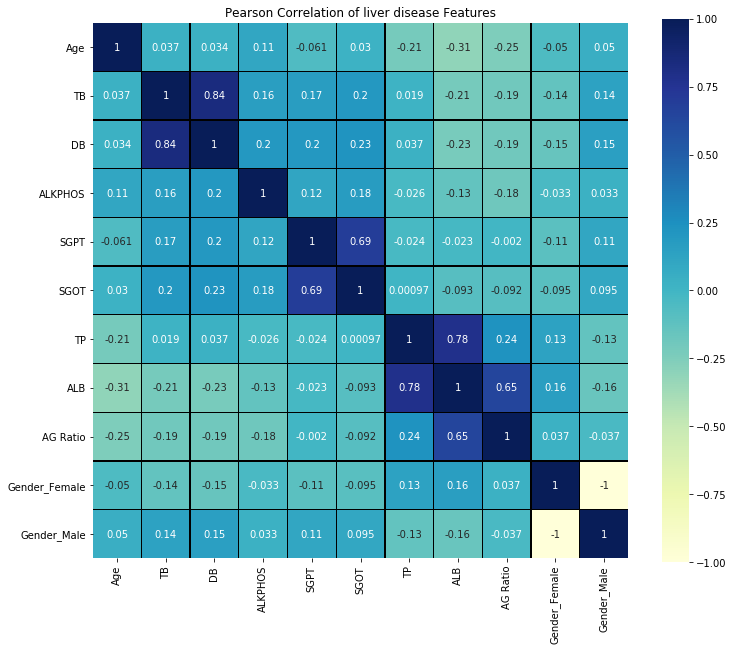

In [17]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of liver disease Features')

# Draw the heatmap using seaborn
sns.heatmap(X_train.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)

As we can see above:
- DB & TB
- SGOT & SGPT
- ALB & TP

are highly correlated. Now we need to make a feature ranking to decide what features we want to use in classification.

# Training and predictions (no feature selection)

In [18]:
df.shape

(583, 12)

In [19]:
# create 2 layers of 20 nodes each + 2000 iterations
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(20), max_iter=2000, activation='tanh', learning_rate_init=0.02)

# train algorithm on training data
mlp.fit(X_train, y_train.values.ravel())

# make predictions
predictions = mlp.predict(X_test)

# accuracy score
acc = accuracy_score(y_test, predictions)

# Check the results

In [20]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print("Accuracy Using MLP: " + str(acc)+'\n')

[[97 21]
 [29 28]]
              precision    recall  f1-score   support

           1       0.77      0.82      0.80       118
           2       0.57      0.49      0.53        57

    accuracy                           0.71       175
   macro avg       0.67      0.66      0.66       175
weighted avg       0.71      0.71      0.71       175

Accuracy Using MLP: 0.7142857142857143



# Training and predictions (feature selection)

## select features

In [21]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

new_X_train = X_train.filter(['DB', 'TB', 'SGOT', 'SGPT', 'ALB', 'TP'], axis=1)
new_X_test = X_test.filter(['DB', 'TB', 'SGOT', 'SGPT', 'ALB', 'TP'], axis=1)


new_X_train.head()

,DB,TB,SGOT,SGPT,ALB,TP
0,-0.392205,-0.316605,-0.236735,-0.221902,-1.277579,-1.058547
1,-0.427820,-0.347456,-0.317535,-0.342376,-0.286605,-0.259249
2,-0.463435,-0.393733,-0.264839,-0.294186,-0.534349,-1.413790
3,-0.463435,-0.409159,-0.289431,-0.342376,-1.029836,-1.058547
4,0.035179,-0.038942,1.056068,0.013022,0.952112,0.273616


In [22]:
new_X_test.head()

,DB,TB,SGOT,SGPT,ALB,TP
0,-0.463435,-0.409159,1.038503,0.711769,0.952112,0.007183
1,-0.249743,-0.254902,-0.184039,-0.252020,0.332753,0.717670
2,-0.178513,-0.193199,0.497493,0.217827,-1.896938,-2.213087
3,0.533793,0.377551,-0.004873,0.175661,0.456625,0.095994
4,-0.499050,-0.409159,-0.303483,-0.324305,2.190829,2.138643


## train & test

In [30]:
# create 2 layers of 20 nodes each + 2000 iterations
#mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(30), max_iter=4000, activation='tanh', learning_rate_init=0.02)
mlp = MLPClassifier(hidden_layer_sizes=(30), max_iter=2000, alpha=1e-4,
                  solver='adam', verbose=10, tol=1e-4, random_state=1,
                  learning_rate_init=0.01)

# train algorithm on training data
mlp.fit(new_X_train, y_train.values.ravel())

# make predictions
predictions = mlp.predict(new_X_test)

# accuracy score
acc = accuracy_score(y_test, predictions)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print("Accuracy Using MLP: " + str(acc)+'\n')

Iteration 1, loss = 0.74559420
Iteration 2, loss = 0.61410879
Iteration 3, loss = 0.56695710
Iteration 4, loss = 0.55462091
Iteration 5, loss = 0.54940819
Iteration 6, loss = 0.54119769
Iteration 7, loss = 0.52781248
Iteration 8, loss = 0.51583158
Iteration 9, loss = 0.50735703
Iteration 10, loss = 0.50238450
Iteration 11, loss = 0.49910713
Iteration 12, loss = 0.49771061
Iteration 13, loss = 0.49472518
Iteration 14, loss = 0.49239091
Iteration 15, loss = 0.49073562
Iteration 16, loss = 0.49018405
Iteration 17, loss = 0.49060483
Iteration 18, loss = 0.49010374
Iteration 19, loss = 0.48873092
Iteration 20, loss = 0.48645044
Iteration 21, loss = 0.48356629
Iteration 22, loss = 0.48029524
Iteration 23, loss = 0.47965000
Iteration 24, loss = 0.47882402
Iteration 25, loss = 0.47854571
Iteration 26, loss = 0.47797326
Iteration 27, loss = 0.47786408
Iteration 28, loss = 0.48388048
Iteration 29, loss = 0.49982056
Iteration 30, loss = 0.50704871
Iteration 31, loss = 0.50024774
Iteration 32, los

## plot learning curve

In [36]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    #http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

Iteration 1, loss = 0.72998053
Iteration 2, loss = 0.69264367
Iteration 3, loss = 0.66046190
Iteration 4, loss = 0.63327511
Iteration 5, loss = 0.61034362
Iteration 6, loss = 0.59064583
Iteration 7, loss = 0.57376435
Iteration 8, loss = 0.55940115
Iteration 9, loss = 0.54702901
Iteration 10, loss = 0.53659426
Iteration 11, loss = 0.52760052
Iteration 12, loss = 0.51952391
Iteration 13, loss = 0.51236934
Iteration 14, loss = 0.50586832
Iteration 15, loss = 0.49987754
Iteration 16, loss = 0.49402802
Iteration 17, loss = 0.48846084
Iteration 18, loss = 0.48342156
Iteration 19, loss = 0.47885211
Iteration 20, loss = 0.47455788
Iteration 21, loss = 0.47059370
Iteration 22, loss = 0.46696980
Iteration 23, loss = 0.46354447
Iteration 24, loss = 0.46031675
Iteration 25, loss = 0.45715406
Iteration 26, loss = 0.45400580
Iteration 27, loss = 0.45078142
Iteration 28, loss = 0.44775756
Iteration 29, loss = 0.44490726
Iteration 30, loss = 0.44228492
Iteration 31, loss = 0.43995636
Iteration 32, los

Iteration 324, loss = 0.11845326
Iteration 325, loss = 0.11799820
Iteration 326, loss = 0.11752959
Iteration 327, loss = 0.11725298
Iteration 328, loss = 0.11658698
Iteration 329, loss = 0.11636693
Iteration 330, loss = 0.11587285
Iteration 331, loss = 0.11534071
Iteration 332, loss = 0.11509152
Iteration 333, loss = 0.11467357
Iteration 334, loss = 0.11426274
Iteration 335, loss = 0.11381042
Iteration 336, loss = 0.11336690
Iteration 337, loss = 0.11284931
Iteration 338, loss = 0.11232639
Iteration 339, loss = 0.11209196
Iteration 340, loss = 0.11183593
Iteration 341, loss = 0.11125062
Iteration 342, loss = 0.11074726
Iteration 343, loss = 0.11047405
Iteration 344, loss = 0.11015695
Iteration 345, loss = 0.10961742
Iteration 346, loss = 0.10913990
Iteration 347, loss = 0.10870957
Iteration 348, loss = 0.10823658
Iteration 349, loss = 0.10799869
Iteration 350, loss = 0.10754540
Iteration 351, loss = 0.10704247
Iteration 352, loss = 0.10676267
Iteration 353, loss = 0.10634071
Iteration 

Iteration 67, loss = 0.38429807
Iteration 68, loss = 0.38385625
Iteration 69, loss = 0.38344844
Iteration 70, loss = 0.38305128
Iteration 71, loss = 0.38259407
Iteration 72, loss = 0.38214795
Iteration 73, loss = 0.38173347
Iteration 74, loss = 0.38137686
Iteration 75, loss = 0.38103854
Iteration 76, loss = 0.38067497
Iteration 77, loss = 0.38031211
Iteration 78, loss = 0.38000277
Iteration 79, loss = 0.37969794
Iteration 80, loss = 0.37934440
Iteration 81, loss = 0.37895695
Iteration 82, loss = 0.37859311
Iteration 83, loss = 0.37823336
Iteration 84, loss = 0.37786246
Iteration 85, loss = 0.37747579
Iteration 86, loss = 0.37711537
Iteration 87, loss = 0.37673092
Iteration 88, loss = 0.37631065
Iteration 89, loss = 0.37592584
Iteration 90, loss = 0.37556435
Iteration 91, loss = 0.37521117
Iteration 92, loss = 0.37483214
Iteration 93, loss = 0.37445049
Iteration 94, loss = 0.37408999
Iteration 95, loss = 0.37374160
Iteration 96, loss = 0.37336762
Iteration 97, loss = 0.37297802
Iteratio

Iteration 356, loss = 0.24216861
Iteration 357, loss = 0.24193013
Iteration 358, loss = 0.24153936
Iteration 359, loss = 0.24117037
Iteration 360, loss = 0.24085297
Iteration 361, loss = 0.24044784
Iteration 362, loss = 0.24014449
Iteration 363, loss = 0.23976791
Iteration 364, loss = 0.23926378
Iteration 365, loss = 0.23903225
Iteration 366, loss = 0.23872666
Iteration 367, loss = 0.23844263
Iteration 368, loss = 0.23797640
Iteration 369, loss = 0.23759029
Iteration 370, loss = 0.23742607
Iteration 371, loss = 0.23706013
Iteration 372, loss = 0.23663225
Iteration 373, loss = 0.23625775
Iteration 374, loss = 0.23593021
Iteration 375, loss = 0.23566586
Iteration 376, loss = 0.23522768
Iteration 377, loss = 0.23499922
Iteration 378, loss = 0.23460873
Iteration 379, loss = 0.23430327
Iteration 380, loss = 0.23400470
Iteration 381, loss = 0.23366335
Iteration 382, loss = 0.23341215
Iteration 383, loss = 0.23304012
Iteration 384, loss = 0.23273014
Iteration 385, loss = 0.23235007
Iteration 

Iteration 615, loss = 0.18501377
Iteration 616, loss = 0.18487921
Iteration 617, loss = 0.18491442
Iteration 618, loss = 0.18467879
Iteration 619, loss = 0.18451306
Iteration 620, loss = 0.18433036
Iteration 621, loss = 0.18432827
Iteration 622, loss = 0.18405453
Iteration 623, loss = 0.18385594
Iteration 624, loss = 0.18370275
Iteration 625, loss = 0.18335363
Iteration 626, loss = 0.18342783
Iteration 627, loss = 0.18324325
Iteration 628, loss = 0.18282535
Iteration 629, loss = 0.18259487
Iteration 630, loss = 0.18265437
Iteration 631, loss = 0.18243193
Iteration 632, loss = 0.18215694
Iteration 633, loss = 0.18195049
Iteration 634, loss = 0.18189161
Iteration 635, loss = 0.18160491
Iteration 636, loss = 0.18143422
Iteration 637, loss = 0.18139753
Iteration 638, loss = 0.18120043
Iteration 639, loss = 0.18101563
Iteration 640, loss = 0.18088874
Iteration 641, loss = 0.18066159
Iteration 642, loss = 0.18058530
Iteration 643, loss = 0.18030323
Iteration 644, loss = 0.18022575
Iteration 

Iteration 877, loss = 0.14346618
Iteration 878, loss = 0.14324489
Iteration 879, loss = 0.14346172
Iteration 880, loss = 0.14306417
Iteration 881, loss = 0.14269465
Iteration 882, loss = 0.14279082
Iteration 883, loss = 0.14269354
Iteration 884, loss = 0.14247251
Iteration 885, loss = 0.14225316
Iteration 886, loss = 0.14187263
Iteration 887, loss = 0.14201256
Iteration 888, loss = 0.14179526
Iteration 889, loss = 0.14144155
Iteration 890, loss = 0.14108020
Iteration 891, loss = 0.14123653
Iteration 892, loss = 0.14102019
Iteration 893, loss = 0.14076370
Iteration 894, loss = 0.14074824
Iteration 895, loss = 0.14055107
Iteration 896, loss = 0.14028266
Iteration 897, loss = 0.14023139
Iteration 898, loss = 0.13991916
Iteration 899, loss = 0.13973793
Iteration 900, loss = 0.13954488
Iteration 901, loss = 0.13927053
Iteration 902, loss = 0.13918136
Iteration 903, loss = 0.13901338
Iteration 904, loss = 0.13895861
Iteration 905, loss = 0.13863762
Iteration 906, loss = 0.13840219
Iteration 

Iteration 1143, loss = 0.10671155
Iteration 1144, loss = 0.10645309
Iteration 1145, loss = 0.10650241
Iteration 1146, loss = 0.10648763
Iteration 1147, loss = 0.10645406
Iteration 1148, loss = 0.10622829
Iteration 1149, loss = 0.10604734
Iteration 1150, loss = 0.10589758
Iteration 1151, loss = 0.10574122
Iteration 1152, loss = 0.10564416
Iteration 1153, loss = 0.10564641
Iteration 1154, loss = 0.10536874
Iteration 1155, loss = 0.10529672
Iteration 1156, loss = 0.10542993
Iteration 1157, loss = 0.10544696
Iteration 1158, loss = 0.10510445
Iteration 1159, loss = 0.10513259
Iteration 1160, loss = 0.10494715
Iteration 1161, loss = 0.10458467
Iteration 1162, loss = 0.10502394
Iteration 1163, loss = 0.10474535
Iteration 1164, loss = 0.10441520
Iteration 1165, loss = 0.10449590
Iteration 1166, loss = 0.10460533
Iteration 1167, loss = 0.10430160
Iteration 1168, loss = 0.10432108
Iteration 1169, loss = 0.10448509
Iteration 1170, loss = 0.10402752
Iteration 1171, loss = 0.10355700
Iteration 1172

Iteration 1609, loss = 0.07082687
Iteration 1610, loss = 0.07034840
Iteration 1611, loss = 0.07037728
Iteration 1612, loss = 0.07046543
Iteration 1613, loss = 0.07029067
Iteration 1614, loss = 0.07009942
Iteration 1615, loss = 0.07004758
Iteration 1616, loss = 0.07005255
Iteration 1617, loss = 0.06992987
Iteration 1618, loss = 0.06981892
Iteration 1619, loss = 0.06981300
Iteration 1620, loss = 0.06994740
Iteration 1621, loss = 0.06982816
Iteration 1622, loss = 0.06967090
Iteration 1623, loss = 0.06957672
Iteration 1624, loss = 0.06958859
Iteration 1625, loss = 0.06959568
Iteration 1626, loss = 0.06947310
Iteration 1627, loss = 0.06953317
Iteration 1628, loss = 0.06942356
Iteration 1629, loss = 0.06940491
Iteration 1630, loss = 0.06946972
Iteration 1631, loss = 0.06942904
Iteration 1632, loss = 0.06917891
Iteration 1633, loss = 0.06920562
Iteration 1634, loss = 0.06923416
Iteration 1635, loss = 0.06912438
Iteration 1636, loss = 0.06904986
Iteration 1637, loss = 0.06890861
Iteration 1638

Iteration 369, loss = 0.33855698
Iteration 370, loss = 0.33823991
Iteration 371, loss = 0.33802919
Iteration 372, loss = 0.33790860
Iteration 373, loss = 0.33763364
Iteration 374, loss = 0.33738230
Iteration 375, loss = 0.33721678
Iteration 376, loss = 0.33697396
Iteration 377, loss = 0.33673743
Iteration 378, loss = 0.33660449
Iteration 379, loss = 0.33632446
Iteration 380, loss = 0.33611140
Iteration 381, loss = 0.33589770
Iteration 382, loss = 0.33561707
Iteration 383, loss = 0.33540344
Iteration 384, loss = 0.33524251
Iteration 385, loss = 0.33503168
Iteration 386, loss = 0.33475826
Iteration 387, loss = 0.33447432
Iteration 388, loss = 0.33422153
Iteration 389, loss = 0.33407946
Iteration 390, loss = 0.33385935
Iteration 391, loss = 0.33348559
Iteration 392, loss = 0.33333347
Iteration 393, loss = 0.33303910
Iteration 394, loss = 0.33283480
Iteration 395, loss = 0.33252909
Iteration 396, loss = 0.33222602
Iteration 397, loss = 0.33194170
Iteration 398, loss = 0.33178896
Iteration 

Iteration 781, loss = 0.25060044
Iteration 782, loss = 0.25048482
Iteration 783, loss = 0.25040687
Iteration 784, loss = 0.25017543
Iteration 785, loss = 0.25003544
Iteration 786, loss = 0.25007412
Iteration 787, loss = 0.25003340
Iteration 788, loss = 0.24986967
Iteration 789, loss = 0.24978474
Iteration 790, loss = 0.24968030
Iteration 791, loss = 0.24946336
Iteration 792, loss = 0.24930749
Iteration 793, loss = 0.24910621
Iteration 794, loss = 0.24898870
Iteration 795, loss = 0.24896017
Iteration 796, loss = 0.24886268
Iteration 797, loss = 0.24869389
Iteration 798, loss = 0.24854794
Iteration 799, loss = 0.24837972
Iteration 800, loss = 0.24824339
Iteration 801, loss = 0.24806145
Iteration 802, loss = 0.24795516
Iteration 803, loss = 0.24781856
Iteration 804, loss = 0.24774867
Iteration 805, loss = 0.24757418
Iteration 806, loss = 0.24751471
Iteration 807, loss = 0.24743318
Iteration 808, loss = 0.24749440
Iteration 809, loss = 0.24745425
Iteration 810, loss = 0.24733510
Iteration 

Iteration 1224, loss = 0.20629614
Iteration 1225, loss = 0.20617307
Iteration 1226, loss = 0.20610660
Iteration 1227, loss = 0.20608800
Iteration 1228, loss = 0.20603072
Iteration 1229, loss = 0.20594451
Iteration 1230, loss = 0.20584189
Iteration 1231, loss = 0.20579190
Iteration 1232, loss = 0.20570806
Iteration 1233, loss = 0.20567809
Iteration 1234, loss = 0.20571009
Iteration 1235, loss = 0.20562879
Iteration 1236, loss = 0.20546602
Iteration 1237, loss = 0.20528861
Iteration 1238, loss = 0.20527960
Iteration 1239, loss = 0.20523413
Iteration 1240, loss = 0.20513718
Iteration 1241, loss = 0.20505246
Iteration 1242, loss = 0.20500539
Iteration 1243, loss = 0.20493909
Iteration 1244, loss = 0.20489918
Iteration 1245, loss = 0.20488713
Iteration 1246, loss = 0.20478619
Iteration 1247, loss = 0.20461149
Iteration 1248, loss = 0.20461680
Iteration 1249, loss = 0.20461851
Iteration 1250, loss = 0.20449151
Iteration 1251, loss = 0.20441325
Iteration 1252, loss = 0.20426746
Iteration 1253

Iteration 1667, loss = 0.17888874
Iteration 1668, loss = 0.17874191
Iteration 1669, loss = 0.17868174
Iteration 1670, loss = 0.17871917
Iteration 1671, loss = 0.17862399
Iteration 1672, loss = 0.17860534
Iteration 1673, loss = 0.17864141
Iteration 1674, loss = 0.17859163
Iteration 1675, loss = 0.17863833
Iteration 1676, loss = 0.17849227
Iteration 1677, loss = 0.17836360
Iteration 1678, loss = 0.17828649
Iteration 1679, loss = 0.17828606
Iteration 1680, loss = 0.17828621
Iteration 1681, loss = 0.17838624
Iteration 1682, loss = 0.17827616
Iteration 1683, loss = 0.17825687
Iteration 1684, loss = 0.17812347
Iteration 1685, loss = 0.17804721
Iteration 1686, loss = 0.17807665
Iteration 1687, loss = 0.17799116
Iteration 1688, loss = 0.17774168
Iteration 1689, loss = 0.17762961
Iteration 1690, loss = 0.17748206
Iteration 1691, loss = 0.17744481
Iteration 1692, loss = 0.17740294
Iteration 1693, loss = 0.17737191
Iteration 1694, loss = 0.17729308
Iteration 1695, loss = 0.17727849
Iteration 1696

Iteration 282, loss = 0.43014093
Iteration 283, loss = 0.42340337
Iteration 284, loss = 0.42222245
Iteration 285, loss = 0.42689284
Iteration 286, loss = 0.42813343
Iteration 287, loss = 0.42574800
Iteration 288, loss = 0.42395351
Iteration 289, loss = 0.42063905
Iteration 290, loss = 0.42256434
Iteration 291, loss = 0.42443036
Iteration 292, loss = 0.42544730
Iteration 293, loss = 0.42367911
Iteration 294, loss = 0.42325621
Iteration 295, loss = 0.42292985
Iteration 296, loss = 0.42062307
Iteration 297, loss = 0.42096830
Iteration 298, loss = 0.42287703
Iteration 299, loss = 0.42480849
Iteration 300, loss = 0.42550238
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.75987500
Iteration 2, loss = 0.65463459
Iteration 3, loss = 0.59501327
Iteration 4, loss = 0.56489900
Iteration 5, loss = 0.54574071
Iteration 6, loss = 0.53597191
Iteration 7, loss = 0.52740572
Iteration 8, loss = 0.51969831
Iteration 9, loss = 0.51325226
Iter

Iteration 283, loss = 0.42517390
Iteration 284, loss = 0.42518348
Iteration 285, loss = 0.42453920
Iteration 286, loss = 0.42511823
Iteration 287, loss = 0.42442296
Iteration 288, loss = 0.42474358
Iteration 289, loss = 0.42574061
Iteration 290, loss = 0.42426331
Iteration 291, loss = 0.42493107
Iteration 292, loss = 0.42547567
Iteration 293, loss = 0.42280746
Iteration 294, loss = 0.42402190
Iteration 295, loss = 0.42434409
Iteration 296, loss = 0.42224070
Iteration 297, loss = 0.42367202
Iteration 298, loss = 0.42527051
Iteration 299, loss = 0.42189710
Iteration 300, loss = 0.42163662
Iteration 301, loss = 0.42204168
Iteration 302, loss = 0.42109485
Iteration 303, loss = 0.42104619
Iteration 304, loss = 0.42203472
Iteration 305, loss = 0.42098856
Iteration 306, loss = 0.42091279
Iteration 307, loss = 0.42123176
Iteration 308, loss = 0.42117120
Iteration 309, loss = 0.42016414
Iteration 310, loss = 0.42078162
Iteration 311, loss = 0.41969647
Iteration 312, loss = 0.41970989
Iteration 

Iteration 279, loss = 0.04733131
Iteration 280, loss = 0.04705592
Iteration 281, loss = 0.04693633
Iteration 282, loss = 0.04664388
Iteration 283, loss = 0.04625804
Iteration 284, loss = 0.04595369
Iteration 285, loss = 0.04565940
Iteration 286, loss = 0.04535382
Iteration 287, loss = 0.04498827
Iteration 288, loss = 0.04468170
Iteration 289, loss = 0.04442150
Iteration 290, loss = 0.04416494
Iteration 291, loss = 0.04388792
Iteration 292, loss = 0.04358765
Iteration 293, loss = 0.04326280
Iteration 294, loss = 0.04316011
Iteration 295, loss = 0.04287688
Iteration 296, loss = 0.04264383
Iteration 297, loss = 0.04233503
Iteration 298, loss = 0.04204635
Iteration 299, loss = 0.04173838
Iteration 300, loss = 0.04141179
Iteration 301, loss = 0.04111866
Iteration 302, loss = 0.04085280
Iteration 303, loss = 0.04078060
Iteration 304, loss = 0.04039859
Iteration 305, loss = 0.04010380
Iteration 306, loss = 0.03989963
Iteration 307, loss = 0.03976700
Iteration 308, loss = 0.03942331
Iteration 

Iteration 22, loss = 0.43108192
Iteration 23, loss = 0.42694593
Iteration 24, loss = 0.42310783
Iteration 25, loss = 0.41964451
Iteration 26, loss = 0.41649919
Iteration 27, loss = 0.41356198
Iteration 28, loss = 0.41093001
Iteration 29, loss = 0.40859371
Iteration 30, loss = 0.40646213
Iteration 31, loss = 0.40438202
Iteration 32, loss = 0.40235146
Iteration 33, loss = 0.40029384
Iteration 34, loss = 0.39823582
Iteration 35, loss = 0.39619657
Iteration 36, loss = 0.39427505
Iteration 37, loss = 0.39245700
Iteration 38, loss = 0.39065275
Iteration 39, loss = 0.38894358
Iteration 40, loss = 0.38733514
Iteration 41, loss = 0.38585319
Iteration 42, loss = 0.38448766
Iteration 43, loss = 0.38314790
Iteration 44, loss = 0.38183481
Iteration 45, loss = 0.38053227
Iteration 46, loss = 0.37924926
Iteration 47, loss = 0.37799076
Iteration 48, loss = 0.37674629
Iteration 49, loss = 0.37554428
Iteration 50, loss = 0.37437505
Iteration 51, loss = 0.37324060
Iteration 52, loss = 0.37219530
Iteratio

Iteration 500, loss = 0.16470530
Iteration 501, loss = 0.16433993
Iteration 502, loss = 0.16387559
Iteration 503, loss = 0.16347516
Iteration 504, loss = 0.16310852
Iteration 505, loss = 0.16271681
Iteration 506, loss = 0.16230731
Iteration 507, loss = 0.16204771
Iteration 508, loss = 0.16169578
Iteration 509, loss = 0.16124584
Iteration 510, loss = 0.16095736
Iteration 511, loss = 0.16061466
Iteration 512, loss = 0.16033845
Iteration 513, loss = 0.15985455
Iteration 514, loss = 0.15942101
Iteration 515, loss = 0.15913313
Iteration 516, loss = 0.15869738
Iteration 517, loss = 0.15835536
Iteration 518, loss = 0.15807662
Iteration 519, loss = 0.15766946
Iteration 520, loss = 0.15734025
Iteration 521, loss = 0.15701818
Iteration 522, loss = 0.15675248
Iteration 523, loss = 0.15631735
Iteration 524, loss = 0.15595236
Iteration 525, loss = 0.15569677
Iteration 526, loss = 0.15530870
Iteration 527, loss = 0.15494428
Iteration 528, loss = 0.15463255
Iteration 529, loss = 0.15431952
Iteration 

Iteration 993, loss = 0.07568707
Iteration 994, loss = 0.07561703
Iteration 995, loss = 0.07546783
Iteration 996, loss = 0.07546960
Iteration 997, loss = 0.07538273
Iteration 998, loss = 0.07520539
Iteration 999, loss = 0.07515927
Iteration 1000, loss = 0.07505983
Iteration 1001, loss = 0.07487463
Iteration 1002, loss = 0.07481406
Iteration 1003, loss = 0.07477404
Iteration 1004, loss = 0.07465652
Iteration 1005, loss = 0.07445291
Iteration 1006, loss = 0.07431622
Iteration 1007, loss = 0.07433397
Iteration 1008, loss = 0.07426779
Iteration 1009, loss = 0.07411540
Iteration 1010, loss = 0.07403283
Iteration 1011, loss = 0.07399155
Iteration 1012, loss = 0.07391305
Iteration 1013, loss = 0.07378529
Iteration 1014, loss = 0.07362735
Iteration 1015, loss = 0.07356744
Iteration 1016, loss = 0.07352877
Iteration 1017, loss = 0.07342071
Iteration 1018, loss = 0.07338378
Iteration 1019, loss = 0.07327485
Iteration 1020, loss = 0.07323455
Iteration 1021, loss = 0.07320045
Iteration 1022, loss 

Iteration 246, loss = 0.35742714
Iteration 247, loss = 0.35713204
Iteration 248, loss = 0.35676619
Iteration 249, loss = 0.35645704
Iteration 250, loss = 0.35612942
Iteration 251, loss = 0.35579879
Iteration 252, loss = 0.35542941
Iteration 253, loss = 0.35505861
Iteration 254, loss = 0.35471850
Iteration 255, loss = 0.35441074
Iteration 256, loss = 0.35409581
Iteration 257, loss = 0.35374952
Iteration 258, loss = 0.35338187
Iteration 259, loss = 0.35306905
Iteration 260, loss = 0.35277941
Iteration 261, loss = 0.35243598
Iteration 262, loss = 0.35207409
Iteration 263, loss = 0.35175501
Iteration 264, loss = 0.35143602
Iteration 265, loss = 0.35115219
Iteration 266, loss = 0.35074341
Iteration 267, loss = 0.35042588
Iteration 268, loss = 0.35009081
Iteration 269, loss = 0.34975576
Iteration 270, loss = 0.34944516
Iteration 271, loss = 0.34916022
Iteration 272, loss = 0.34882036
Iteration 273, loss = 0.34844483
Iteration 274, loss = 0.34810683
Iteration 275, loss = 0.34776975
Iteration 

Iteration 681, loss = 0.23417539
Iteration 682, loss = 0.23396632
Iteration 683, loss = 0.23374611
Iteration 684, loss = 0.23351775
Iteration 685, loss = 0.23336344
Iteration 686, loss = 0.23322053
Iteration 687, loss = 0.23294374
Iteration 688, loss = 0.23278908
Iteration 689, loss = 0.23260638
Iteration 690, loss = 0.23238703
Iteration 691, loss = 0.23220398
Iteration 692, loss = 0.23200129
Iteration 693, loss = 0.23180619
Iteration 694, loss = 0.23168563
Iteration 695, loss = 0.23145914
Iteration 696, loss = 0.23124320
Iteration 697, loss = 0.23115728
Iteration 698, loss = 0.23094155
Iteration 699, loss = 0.23073664
Iteration 700, loss = 0.23049505
Iteration 701, loss = 0.23036196
Iteration 702, loss = 0.23022516
Iteration 703, loss = 0.22996062
Iteration 704, loss = 0.22982169
Iteration 705, loss = 0.22961769
Iteration 706, loss = 0.22947184
Iteration 707, loss = 0.22921431
Iteration 708, loss = 0.22910599
Iteration 709, loss = 0.22895321
Iteration 710, loss = 0.22881990
Iteration 

Iteration 1137, loss = 0.17161190
Iteration 1138, loss = 0.17153712
Iteration 1139, loss = 0.17134334
Iteration 1140, loss = 0.17130323
Iteration 1141, loss = 0.17119182
Iteration 1142, loss = 0.17114603
Iteration 1143, loss = 0.17118472
Iteration 1144, loss = 0.17112625
Iteration 1145, loss = 0.17106451
Iteration 1146, loss = 0.17094476
Iteration 1147, loss = 0.17064196
Iteration 1148, loss = 0.17048874
Iteration 1149, loss = 0.17037663
Iteration 1150, loss = 0.17028519
Iteration 1151, loss = 0.17016716
Iteration 1152, loss = 0.17000042
Iteration 1153, loss = 0.16995173
Iteration 1154, loss = 0.16979840
Iteration 1155, loss = 0.16969271
Iteration 1156, loss = 0.16962660
Iteration 1157, loss = 0.16951941
Iteration 1158, loss = 0.16940788
Iteration 1159, loss = 0.16936289
Iteration 1160, loss = 0.16932798
Iteration 1161, loss = 0.16934900
Iteration 1162, loss = 0.16931948
Iteration 1163, loss = 0.16908692
Iteration 1164, loss = 0.16883734
Iteration 1165, loss = 0.16861948
Iteration 1166

Iteration 1574, loss = 0.12879573
Iteration 1575, loss = 0.12872436
Iteration 1576, loss = 0.12864160
Iteration 1577, loss = 0.12858499
Iteration 1578, loss = 0.12854154
Iteration 1579, loss = 0.12851615
Iteration 1580, loss = 0.12866672
Iteration 1581, loss = 0.12862862
Iteration 1582, loss = 0.12842315
Iteration 1583, loss = 0.12835655
Iteration 1584, loss = 0.12817565
Iteration 1585, loss = 0.12801898
Iteration 1586, loss = 0.12789339
Iteration 1587, loss = 0.12782760
Iteration 1588, loss = 0.12764697
Iteration 1589, loss = 0.12766586
Iteration 1590, loss = 0.12760963
Iteration 1591, loss = 0.12748753
Iteration 1592, loss = 0.12750767
Iteration 1593, loss = 0.12752104
Iteration 1594, loss = 0.12741267
Iteration 1595, loss = 0.12729750
Iteration 1596, loss = 0.12713495
Iteration 1597, loss = 0.12706799
Iteration 1598, loss = 0.12694351
Iteration 1599, loss = 0.12706564
Iteration 1600, loss = 0.12715401
Iteration 1601, loss = 0.12722128
Iteration 1602, loss = 0.12695504
Iteration 1603

Iteration 209, loss = 0.43490506
Iteration 210, loss = 0.43610222
Iteration 211, loss = 0.43560324
Iteration 212, loss = 0.43442997
Iteration 213, loss = 0.43452222
Iteration 214, loss = 0.43518451
Iteration 215, loss = 0.43593591
Iteration 216, loss = 0.43519174
Iteration 217, loss = 0.43300080
Iteration 218, loss = 0.43383305
Iteration 219, loss = 0.43225492
Iteration 220, loss = 0.43136962
Iteration 221, loss = 0.43292204
Iteration 222, loss = 0.43485855
Iteration 223, loss = 0.43501327
Iteration 224, loss = 0.43458122
Iteration 225, loss = 0.43391371
Iteration 226, loss = 0.43306975
Iteration 227, loss = 0.43213054
Iteration 228, loss = 0.43314940
Iteration 229, loss = 0.43071823
Iteration 230, loss = 0.43220088
Iteration 231, loss = 0.43291177
Iteration 232, loss = 0.43311687
Iteration 233, loss = 0.43478386
Iteration 234, loss = 0.43558458
Iteration 235, loss = 0.43424031
Iteration 236, loss = 0.43291016
Iteration 237, loss = 0.43182549
Iteration 238, loss = 0.43033386
Iteration 

Iteration 193, loss = 0.44278402
Iteration 194, loss = 0.44233357
Iteration 195, loss = 0.44200104
Iteration 196, loss = 0.44139891
Iteration 197, loss = 0.44094214
Iteration 198, loss = 0.44135806
Iteration 199, loss = 0.44170917
Iteration 200, loss = 0.44103673
Iteration 201, loss = 0.44031312
Iteration 202, loss = 0.44000073
Iteration 203, loss = 0.43982692
Iteration 204, loss = 0.43997456
Iteration 205, loss = 0.43954984
Iteration 206, loss = 0.43939563
Iteration 207, loss = 0.43903048
Iteration 208, loss = 0.43976598
Iteration 209, loss = 0.43995096
Iteration 210, loss = 0.43908583
Iteration 211, loss = 0.43813450
Iteration 212, loss = 0.43888285
Iteration 213, loss = 0.43927189
Iteration 214, loss = 0.43825909
Iteration 215, loss = 0.43889947
Iteration 216, loss = 0.43840231
Iteration 217, loss = 0.43752539
Iteration 218, loss = 0.43695207
Iteration 219, loss = 0.43838481
Iteration 220, loss = 0.43829392
Iteration 221, loss = 0.43739641
Iteration 222, loss = 0.43649549
Iteration 

Iteration 463, loss = 0.39245250
Iteration 464, loss = 0.39044048
Iteration 465, loss = 0.39349602
Iteration 466, loss = 0.39008355
Iteration 467, loss = 0.39008351
Iteration 468, loss = 0.39533316
Iteration 469, loss = 0.39220067
Iteration 470, loss = 0.39202719
Iteration 471, loss = 0.39222608
Iteration 472, loss = 0.38996977
Iteration 473, loss = 0.38968554
Iteration 474, loss = 0.38871359
Iteration 475, loss = 0.39381671
Iteration 476, loss = 0.38931496
Iteration 477, loss = 0.38979829
Iteration 478, loss = 0.39085850
Iteration 479, loss = 0.38817944
Iteration 480, loss = 0.39067236
Iteration 481, loss = 0.39056968
Iteration 482, loss = 0.38862467
Iteration 483, loss = 0.38790919
Iteration 484, loss = 0.38908126
Iteration 485, loss = 0.38799598
Iteration 486, loss = 0.38938781
Iteration 487, loss = 0.38908605
Iteration 488, loss = 0.38692531
Iteration 489, loss = 0.38738644
Iteration 490, loss = 0.38863924
Iteration 491, loss = 0.38619938
Iteration 492, loss = 0.38750757
Iteration 

Iteration 238, loss = 0.06304454
Iteration 239, loss = 0.06271810
Iteration 240, loss = 0.06227841
Iteration 241, loss = 0.06165596
Iteration 242, loss = 0.06121226
Iteration 243, loss = 0.06082000
Iteration 244, loss = 0.06039464
Iteration 245, loss = 0.05994485
Iteration 246, loss = 0.05947491
Iteration 247, loss = 0.05896489
Iteration 248, loss = 0.05847952
Iteration 249, loss = 0.05811592
Iteration 250, loss = 0.05767128
Iteration 251, loss = 0.05728867
Iteration 252, loss = 0.05677016
Iteration 253, loss = 0.05638319
Iteration 254, loss = 0.05604066
Iteration 255, loss = 0.05572434
Iteration 256, loss = 0.05542369
Iteration 257, loss = 0.05506386
Iteration 258, loss = 0.05456679
Iteration 259, loss = 0.05414487
Iteration 260, loss = 0.05387637
Iteration 261, loss = 0.05346783
Iteration 262, loss = 0.05300604
Iteration 263, loss = 0.05290013
Iteration 264, loss = 0.05237971
Iteration 265, loss = 0.05208463
Iteration 266, loss = 0.05179586
Iteration 267, loss = 0.05148588
Iteration 

Iteration 18, loss = 0.48222043
Iteration 19, loss = 0.47762159
Iteration 20, loss = 0.47334436
Iteration 21, loss = 0.46940608
Iteration 22, loss = 0.46581232
Iteration 23, loss = 0.46262369
Iteration 24, loss = 0.45987207
Iteration 25, loss = 0.45738643
Iteration 26, loss = 0.45503188
Iteration 27, loss = 0.45270866
Iteration 28, loss = 0.45034071
Iteration 29, loss = 0.44796557
Iteration 30, loss = 0.44561102
Iteration 31, loss = 0.44331590
Iteration 32, loss = 0.44110771
Iteration 33, loss = 0.43907289
Iteration 34, loss = 0.43731863
Iteration 35, loss = 0.43566373
Iteration 36, loss = 0.43411166
Iteration 37, loss = 0.43265886
Iteration 38, loss = 0.43125847
Iteration 39, loss = 0.42991130
Iteration 40, loss = 0.42864857
Iteration 41, loss = 0.42744092
Iteration 42, loss = 0.42630852
Iteration 43, loss = 0.42515719
Iteration 44, loss = 0.42398533
Iteration 45, loss = 0.42282784
Iteration 46, loss = 0.42166634
Iteration 47, loss = 0.42049956
Iteration 48, loss = 0.41951007
Iteratio

Iteration 298, loss = 0.36137891
Iteration 299, loss = 0.36121279
Iteration 300, loss = 0.36114286
Iteration 301, loss = 0.36098480
Iteration 302, loss = 0.36080785
Iteration 303, loss = 0.36048105
Iteration 304, loss = 0.36022383
Iteration 305, loss = 0.36010438
Iteration 306, loss = 0.35987330
Iteration 307, loss = 0.35972343
Iteration 308, loss = 0.35955634
Iteration 309, loss = 0.35929357
Iteration 310, loss = 0.35914066
Iteration 311, loss = 0.35890559
Iteration 312, loss = 0.35869359
Iteration 313, loss = 0.35852917
Iteration 314, loss = 0.35828983
Iteration 315, loss = 0.35811462
Iteration 316, loss = 0.35793150
Iteration 317, loss = 0.35782861
Iteration 318, loss = 0.35754520
Iteration 319, loss = 0.35725730
Iteration 320, loss = 0.35715410
Iteration 321, loss = 0.35697323
Iteration 322, loss = 0.35683597
Iteration 323, loss = 0.35668558
Iteration 324, loss = 0.35643742
Iteration 325, loss = 0.35619418
Iteration 326, loss = 0.35594550
Iteration 327, loss = 0.35583908
Iteration 

Iteration 745, loss = 0.22926752
Iteration 746, loss = 0.22894325
Iteration 747, loss = 0.22879014
Iteration 748, loss = 0.22843097
Iteration 749, loss = 0.22797646
Iteration 750, loss = 0.22783395
Iteration 751, loss = 0.22760143
Iteration 752, loss = 0.22723641
Iteration 753, loss = 0.22691047
Iteration 754, loss = 0.22649305
Iteration 755, loss = 0.22643865
Iteration 756, loss = 0.22616793
Iteration 757, loss = 0.22583235
Iteration 758, loss = 0.22565188
Iteration 759, loss = 0.22515466
Iteration 760, loss = 0.22489384
Iteration 761, loss = 0.22463482
Iteration 762, loss = 0.22439868
Iteration 763, loss = 0.22424716
Iteration 764, loss = 0.22388347
Iteration 765, loss = 0.22355389
Iteration 766, loss = 0.22326882
Iteration 767, loss = 0.22308708
Iteration 768, loss = 0.22278246
Iteration 769, loss = 0.22239413
Iteration 770, loss = 0.22218116
Iteration 771, loss = 0.22192353
Iteration 772, loss = 0.22149415
Iteration 773, loss = 0.22140568
Iteration 774, loss = 0.22103489
Iteration 

Iteration 1016, loss = 0.17150422
Iteration 1017, loss = 0.17135971
Iteration 1018, loss = 0.17178093
Iteration 1019, loss = 0.17138324
Iteration 1020, loss = 0.17105629
Iteration 1021, loss = 0.17111781
Iteration 1022, loss = 0.17106435
Iteration 1023, loss = 0.17088505
Iteration 1024, loss = 0.17065920
Iteration 1025, loss = 0.17050803
Iteration 1026, loss = 0.17075402
Iteration 1027, loss = 0.17036508
Iteration 1028, loss = 0.16983047
Iteration 1029, loss = 0.16967063
Iteration 1030, loss = 0.16947024
Iteration 1031, loss = 0.16948412
Iteration 1032, loss = 0.16933893
Iteration 1033, loss = 0.16922787
Iteration 1034, loss = 0.16923324
Iteration 1035, loss = 0.16892169
Iteration 1036, loss = 0.16864301
Iteration 1037, loss = 0.16864281
Iteration 1038, loss = 0.16846518
Iteration 1039, loss = 0.16855875
Iteration 1040, loss = 0.16830920
Iteration 1041, loss = 0.16796622
Iteration 1042, loss = 0.16812259
Iteration 1043, loss = 0.16780004
Iteration 1044, loss = 0.16795576
Iteration 1045

Iteration 1303, loss = 0.14004136
Iteration 1304, loss = 0.14012821
Iteration 1305, loss = 0.14008799
Iteration 1306, loss = 0.13993916
Iteration 1307, loss = 0.13971165
Iteration 1308, loss = 0.13979793
Iteration 1309, loss = 0.13952373
Iteration 1310, loss = 0.13954297
Iteration 1311, loss = 0.13949782
Iteration 1312, loss = 0.13927454
Iteration 1313, loss = 0.13925901
Iteration 1314, loss = 0.13927158
Iteration 1315, loss = 0.13903260
Iteration 1316, loss = 0.13905589
Iteration 1317, loss = 0.13890832
Iteration 1318, loss = 0.13875135
Iteration 1319, loss = 0.13880247
Iteration 1320, loss = 0.13864355
Iteration 1321, loss = 0.13861508
Iteration 1322, loss = 0.13856333
Iteration 1323, loss = 0.13839112
Iteration 1324, loss = 0.13818543
Iteration 1325, loss = 0.13816982
Iteration 1326, loss = 0.13829383
Iteration 1327, loss = 0.13811862
Iteration 1328, loss = 0.13814566
Iteration 1329, loss = 0.13793004
Iteration 1330, loss = 0.13774141
Iteration 1331, loss = 0.13767304
Iteration 1332

Iteration 1572, loss = 0.12124253
Iteration 1573, loss = 0.12114068
Iteration 1574, loss = 0.12112362
Iteration 1575, loss = 0.12115935
Iteration 1576, loss = 0.12104987
Iteration 1577, loss = 0.12095934
Iteration 1578, loss = 0.12077537
Iteration 1579, loss = 0.12072147
Iteration 1580, loss = 0.12065792
Iteration 1581, loss = 0.12056516
Iteration 1582, loss = 0.12051656
Iteration 1583, loss = 0.12043680
Iteration 1584, loss = 0.12038432
Iteration 1585, loss = 0.12047291
Iteration 1586, loss = 0.12031288
Iteration 1587, loss = 0.12043560
Iteration 1588, loss = 0.12047336
Iteration 1589, loss = 0.12028393
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.76527819
Iteration 2, loss = 0.70733934
Iteration 3, loss = 0.65800068
Iteration 4, loss = 0.61748684
Iteration 5, loss = 0.58481066
Iteration 6, loss = 0.55887811
Iteration 7, loss = 0.53835648
Iteration 8, loss = 0.52235331
Iteration 9, loss = 0.51000396
Iteration 10, loss 

Iteration 232, loss = 0.37514410
Iteration 233, loss = 0.37500708
Iteration 234, loss = 0.37481767
Iteration 235, loss = 0.37464184
Iteration 236, loss = 0.37448346
Iteration 237, loss = 0.37434377
Iteration 238, loss = 0.37421392
Iteration 239, loss = 0.37399697
Iteration 240, loss = 0.37382762
Iteration 241, loss = 0.37365424
Iteration 242, loss = 0.37351918
Iteration 243, loss = 0.37334131
Iteration 244, loss = 0.37315612
Iteration 245, loss = 0.37300246
Iteration 246, loss = 0.37284530
Iteration 247, loss = 0.37270240
Iteration 248, loss = 0.37251472
Iteration 249, loss = 0.37233544
Iteration 250, loss = 0.37216473
Iteration 251, loss = 0.37200163
Iteration 252, loss = 0.37184330
Iteration 253, loss = 0.37165745
Iteration 254, loss = 0.37152464
Iteration 255, loss = 0.37137044
Iteration 256, loss = 0.37118937
Iteration 257, loss = 0.37108790
Iteration 258, loss = 0.37085444
Iteration 259, loss = 0.37074079
Iteration 260, loss = 0.37059402
Iteration 261, loss = 0.37036557
Iteration 

Iteration 504, loss = 0.33597547
Iteration 505, loss = 0.33586782
Iteration 506, loss = 0.33572055
Iteration 507, loss = 0.33565842
Iteration 508, loss = 0.33558365
Iteration 509, loss = 0.33542636
Iteration 510, loss = 0.33524957
Iteration 511, loss = 0.33514760
Iteration 512, loss = 0.33503673
Iteration 513, loss = 0.33491932
Iteration 514, loss = 0.33475881
Iteration 515, loss = 0.33467240
Iteration 516, loss = 0.33459624
Iteration 517, loss = 0.33447229
Iteration 518, loss = 0.33438502
Iteration 519, loss = 0.33423195
Iteration 520, loss = 0.33410321
Iteration 521, loss = 0.33400699
Iteration 522, loss = 0.33391041
Iteration 523, loss = 0.33371218
Iteration 524, loss = 0.33362963
Iteration 525, loss = 0.33354461
Iteration 526, loss = 0.33338135
Iteration 527, loss = 0.33326002
Iteration 528, loss = 0.33311120
Iteration 529, loss = 0.33299917
Iteration 530, loss = 0.33293426
Iteration 531, loss = 0.33273689
Iteration 532, loss = 0.33274993
Iteration 533, loss = 0.33264890
Iteration 

Iteration 975, loss = 0.23884352
Iteration 976, loss = 0.23855986
Iteration 977, loss = 0.23824962
Iteration 978, loss = 0.23805526
Iteration 979, loss = 0.23784729
Iteration 980, loss = 0.23768057
Iteration 981, loss = 0.23747653
Iteration 982, loss = 0.23735406
Iteration 983, loss = 0.23714968
Iteration 984, loss = 0.23686974
Iteration 985, loss = 0.23664778
Iteration 986, loss = 0.23643810
Iteration 987, loss = 0.23619790
Iteration 988, loss = 0.23598285
Iteration 989, loss = 0.23578388
Iteration 990, loss = 0.23557672
Iteration 991, loss = 0.23542522
Iteration 992, loss = 0.23522887
Iteration 993, loss = 0.23505940
Iteration 994, loss = 0.23483918
Iteration 995, loss = 0.23464145
Iteration 996, loss = 0.23454865
Iteration 997, loss = 0.23421885
Iteration 998, loss = 0.23401213
Iteration 999, loss = 0.23386706
Iteration 1000, loss = 0.23362934
Iteration 1001, loss = 0.23345291
Iteration 1002, loss = 0.23319998
Iteration 1003, loss = 0.23302600
Iteration 1004, loss = 0.23286455
Itera

Iteration 1229, loss = 0.19656014
Iteration 1230, loss = 0.19644926
Iteration 1231, loss = 0.19637917
Iteration 1232, loss = 0.19627191
Iteration 1233, loss = 0.19611956
Iteration 1234, loss = 0.19600861
Iteration 1235, loss = 0.19585680
Iteration 1236, loss = 0.19564076
Iteration 1237, loss = 0.19544374
Iteration 1238, loss = 0.19532649
Iteration 1239, loss = 0.19521902
Iteration 1240, loss = 0.19512240
Iteration 1241, loss = 0.19502825
Iteration 1242, loss = 0.19496433
Iteration 1243, loss = 0.19487984
Iteration 1244, loss = 0.19469002
Iteration 1245, loss = 0.19456488
Iteration 1246, loss = 0.19439777
Iteration 1247, loss = 0.19418817
Iteration 1248, loss = 0.19408498
Iteration 1249, loss = 0.19403488
Iteration 1250, loss = 0.19390413
Iteration 1251, loss = 0.19374506
Iteration 1252, loss = 0.19367582
Iteration 1253, loss = 0.19347625
Iteration 1254, loss = 0.19338366
Iteration 1255, loss = 0.19322509
Iteration 1256, loss = 0.19299739
Iteration 1257, loss = 0.19292602
Iteration 1258

Iteration 1476, loss = 0.17135920
Iteration 1477, loss = 0.17126819
Iteration 1478, loss = 0.17115977
Iteration 1479, loss = 0.17096653
Iteration 1480, loss = 0.17079649
Iteration 1481, loss = 0.17075298
Iteration 1482, loss = 0.17070175
Iteration 1483, loss = 0.17065048
Iteration 1484, loss = 0.17056234
Iteration 1485, loss = 0.17050176
Iteration 1486, loss = 0.17033238
Iteration 1487, loss = 0.17020741
Iteration 1488, loss = 0.17019255
Iteration 1489, loss = 0.17013454
Iteration 1490, loss = 0.17006258
Iteration 1491, loss = 0.17002794
Iteration 1492, loss = 0.16997465
Iteration 1493, loss = 0.16979495
Iteration 1494, loss = 0.16966074
Iteration 1495, loss = 0.16956053
Iteration 1496, loss = 0.16949591
Iteration 1497, loss = 0.16946822
Iteration 1498, loss = 0.16948565
Iteration 1499, loss = 0.16952853
Iteration 1500, loss = 0.16946656
Iteration 1501, loss = 0.16922465
Iteration 1502, loss = 0.16901112
Iteration 1503, loss = 0.16892144
Iteration 1504, loss = 0.16885190
Iteration 1505

Iteration 94, loss = 0.45168811
Iteration 95, loss = 0.45119282
Iteration 96, loss = 0.45036619
Iteration 97, loss = 0.44943052
Iteration 98, loss = 0.44966024
Iteration 99, loss = 0.44971514
Iteration 100, loss = 0.44956151
Iteration 101, loss = 0.45072098
Iteration 102, loss = 0.44967639
Iteration 103, loss = 0.44879584
Iteration 104, loss = 0.44865046
Iteration 105, loss = 0.44824587
Iteration 106, loss = 0.44832070
Iteration 107, loss = 0.44786942
Iteration 108, loss = 0.44777206
Iteration 109, loss = 0.44793115
Iteration 110, loss = 0.44978856
Iteration 111, loss = 0.45024835
Iteration 112, loss = 0.44893467
Iteration 113, loss = 0.44775037
Iteration 114, loss = 0.44728571
Iteration 115, loss = 0.44699619
Iteration 116, loss = 0.44622584
Iteration 117, loss = 0.44596625
Iteration 118, loss = 0.44571959
Iteration 119, loss = 0.44632086
Iteration 120, loss = 0.44644092
Iteration 121, loss = 0.44595802
Iteration 122, loss = 0.44683749
Iteration 123, loss = 0.44723931
Iteration 124, l

Iteration 147, loss = 0.45288300
Iteration 148, loss = 0.45218401
Iteration 149, loss = 0.45252880
Iteration 150, loss = 0.45255341
Iteration 151, loss = 0.45233300
Iteration 152, loss = 0.45181852
Iteration 153, loss = 0.45176996
Iteration 154, loss = 0.45204001
Iteration 155, loss = 0.45193741
Iteration 156, loss = 0.45128028
Iteration 157, loss = 0.45089420
Iteration 158, loss = 0.45097984
Iteration 159, loss = 0.45085718
Iteration 160, loss = 0.45036819
Iteration 161, loss = 0.45121232
Iteration 162, loss = 0.45103691
Iteration 163, loss = 0.45026464
Iteration 164, loss = 0.44946424
Iteration 165, loss = 0.44953468
Iteration 166, loss = 0.45198658
Iteration 167, loss = 0.45169145
Iteration 168, loss = 0.44979004
Iteration 169, loss = 0.44883063
Iteration 170, loss = 0.44974825
Iteration 171, loss = 0.44943641
Iteration 172, loss = 0.44891167
Iteration 173, loss = 0.44905980
Iteration 174, loss = 0.44878825
Iteration 175, loss = 0.44856958
Iteration 176, loss = 0.44800278
Iteration 

Iteration 439, loss = 0.41176722
Iteration 440, loss = 0.40804096
Iteration 441, loss = 0.40760325
Iteration 442, loss = 0.40890783
Iteration 443, loss = 0.40809517
Iteration 444, loss = 0.40744683
Iteration 445, loss = 0.41075288
Iteration 446, loss = 0.40853696
Iteration 447, loss = 0.40830063
Iteration 448, loss = 0.40744020
Iteration 449, loss = 0.40826884
Iteration 450, loss = 0.40794401
Iteration 451, loss = 0.40798454
Iteration 452, loss = 0.40607810
Iteration 453, loss = 0.41081597
Iteration 454, loss = 0.40872027
Iteration 455, loss = 0.40641187
Iteration 456, loss = 0.41023015
Iteration 457, loss = 0.40700215
Iteration 458, loss = 0.40585916
Iteration 459, loss = 0.40720294
Iteration 460, loss = 0.40656909
Iteration 461, loss = 0.40602546
Iteration 462, loss = 0.40608824
Iteration 463, loss = 0.40538618
Iteration 464, loss = 0.40692720
Iteration 465, loss = 0.40559421
Iteration 466, loss = 0.40580676
Iteration 467, loss = 0.40521204
Iteration 468, loss = 0.40697211
Iteration 

Iteration 369, loss = 0.02779114
Iteration 370, loss = 0.02755601
Iteration 371, loss = 0.02747806
Iteration 372, loss = 0.02728523
Iteration 373, loss = 0.02717301
Iteration 374, loss = 0.02697691
Iteration 375, loss = 0.02684217
Iteration 376, loss = 0.02673404
Iteration 377, loss = 0.02661014
Iteration 378, loss = 0.02641588
Iteration 379, loss = 0.02626999
Iteration 380, loss = 0.02621800
Iteration 381, loss = 0.02601226
Iteration 382, loss = 0.02587895
Iteration 383, loss = 0.02574099
Iteration 384, loss = 0.02565191
Iteration 385, loss = 0.02552585
Iteration 386, loss = 0.02539067
Iteration 387, loss = 0.02526080
Iteration 388, loss = 0.02510995
Iteration 389, loss = 0.02495086
Iteration 390, loss = 0.02487470
Iteration 391, loss = 0.02469914
Iteration 392, loss = 0.02458446
Iteration 393, loss = 0.02447625
Iteration 394, loss = 0.02437829
Iteration 395, loss = 0.02424288
Iteration 396, loss = 0.02410640
Iteration 397, loss = 0.02399244
Iteration 398, loss = 0.02397932
Iteration 

Iteration 328, loss = 0.35557554
Iteration 329, loss = 0.35541403
Iteration 330, loss = 0.35523719
Iteration 331, loss = 0.35499860
Iteration 332, loss = 0.35482776
Iteration 333, loss = 0.35457670
Iteration 334, loss = 0.35437440
Iteration 335, loss = 0.35414653
Iteration 336, loss = 0.35400973
Iteration 337, loss = 0.35381995
Iteration 338, loss = 0.35349181
Iteration 339, loss = 0.35340852
Iteration 340, loss = 0.35319228
Iteration 341, loss = 0.35299901
Iteration 342, loss = 0.35272825
Iteration 343, loss = 0.35264079
Iteration 344, loss = 0.35230676
Iteration 345, loss = 0.35204161
Iteration 346, loss = 0.35184287
Iteration 347, loss = 0.35172339
Iteration 348, loss = 0.35142048
Iteration 349, loss = 0.35111838
Iteration 350, loss = 0.35098053
Iteration 351, loss = 0.35073128
Iteration 352, loss = 0.35044932
Iteration 353, loss = 0.35018534
Iteration 354, loss = 0.35010548
Iteration 355, loss = 0.34980084
Iteration 356, loss = 0.34955977
Iteration 357, loss = 0.34934233
Iteration 

Iteration 815, loss = 0.21129017
Iteration 816, loss = 0.21151587
Iteration 817, loss = 0.21102136
Iteration 818, loss = 0.21042217
Iteration 819, loss = 0.20997362
Iteration 820, loss = 0.20997530
Iteration 821, loss = 0.20970801
Iteration 822, loss = 0.20927622
Iteration 823, loss = 0.20897770
Iteration 824, loss = 0.20873182
Iteration 825, loss = 0.20869932
Iteration 826, loss = 0.20843816
Iteration 827, loss = 0.20804796
Iteration 828, loss = 0.20769385
Iteration 829, loss = 0.20743172
Iteration 830, loss = 0.20724749
Iteration 831, loss = 0.20712088
Iteration 832, loss = 0.20676395
Iteration 833, loss = 0.20658818
Iteration 834, loss = 0.20643956
Iteration 835, loss = 0.20620844
Iteration 836, loss = 0.20581762
Iteration 837, loss = 0.20551056
Iteration 838, loss = 0.20564809
Iteration 839, loss = 0.20564251
Iteration 840, loss = 0.20538662
Iteration 841, loss = 0.20479391
Iteration 842, loss = 0.20455442
Iteration 843, loss = 0.20435516
Iteration 844, loss = 0.20419009
Iteration 

Iteration 1277, loss = 0.14232759
Iteration 1278, loss = 0.14223442
Iteration 1279, loss = 0.14208289
Iteration 1280, loss = 0.14200689
Iteration 1281, loss = 0.14191040
Iteration 1282, loss = 0.14185140
Iteration 1283, loss = 0.14172890
Iteration 1284, loss = 0.14159771
Iteration 1285, loss = 0.14154745
Iteration 1286, loss = 0.14147464
Iteration 1287, loss = 0.14143821
Iteration 1288, loss = 0.14167404
Iteration 1289, loss = 0.14172681
Iteration 1290, loss = 0.14133081
Iteration 1291, loss = 0.14122387
Iteration 1292, loss = 0.14094060
Iteration 1293, loss = 0.14083939
Iteration 1294, loss = 0.14087437
Iteration 1295, loss = 0.14086866
Iteration 1296, loss = 0.14076233
Iteration 1297, loss = 0.14059858
Iteration 1298, loss = 0.14062829
Iteration 1299, loss = 0.14095029
Iteration 1300, loss = 0.14097715
Iteration 1301, loss = 0.14084893
Iteration 1302, loss = 0.14041226
Iteration 1303, loss = 0.14004136
Iteration 1304, loss = 0.14012821
Iteration 1305, loss = 0.14008799
Iteration 1306

Iteration 140, loss = 0.39150825
Iteration 141, loss = 0.39132187
Iteration 142, loss = 0.39117704
Iteration 143, loss = 0.39106974
Iteration 144, loss = 0.39090208
Iteration 145, loss = 0.39071873
Iteration 146, loss = 0.39057940
Iteration 147, loss = 0.39041781
Iteration 148, loss = 0.39023605
Iteration 149, loss = 0.39013153
Iteration 150, loss = 0.38995537
Iteration 151, loss = 0.38979192
Iteration 152, loss = 0.38965742
Iteration 153, loss = 0.38948575
Iteration 154, loss = 0.38933313
Iteration 155, loss = 0.38921273
Iteration 156, loss = 0.38905239
Iteration 157, loss = 0.38889580
Iteration 158, loss = 0.38877770
Iteration 159, loss = 0.38857922
Iteration 160, loss = 0.38847551
Iteration 161, loss = 0.38832788
Iteration 162, loss = 0.38816802
Iteration 163, loss = 0.38802336
Iteration 164, loss = 0.38788317
Iteration 165, loss = 0.38772605
Iteration 166, loss = 0.38759822
Iteration 167, loss = 0.38744537
Iteration 168, loss = 0.38732565
Iteration 169, loss = 0.38718860
Iteration 

Iteration 582, loss = 0.31991678
Iteration 583, loss = 0.31970954
Iteration 584, loss = 0.31965280
Iteration 585, loss = 0.31947088
Iteration 586, loss = 0.31938248
Iteration 587, loss = 0.31929226
Iteration 588, loss = 0.31912686
Iteration 589, loss = 0.31901384
Iteration 590, loss = 0.31888893
Iteration 591, loss = 0.31881977
Iteration 592, loss = 0.31861340
Iteration 593, loss = 0.31856997
Iteration 594, loss = 0.31849026
Iteration 595, loss = 0.31836208
Iteration 596, loss = 0.31820199
Iteration 597, loss = 0.31809269
Iteration 598, loss = 0.31798109
Iteration 599, loss = 0.31787636
Iteration 600, loss = 0.31782183
Iteration 601, loss = 0.31758300
Iteration 602, loss = 0.31742557
Iteration 603, loss = 0.31748630
Iteration 604, loss = 0.31734602
Iteration 605, loss = 0.31705931
Iteration 606, loss = 0.31699223
Iteration 607, loss = 0.31688126
Iteration 608, loss = 0.31670064
Iteration 609, loss = 0.31663282
Iteration 610, loss = 0.31659425
Iteration 611, loss = 0.31642581
Iteration 

Iteration 1001, loss = 0.25901958
Iteration 1002, loss = 0.25890126
Iteration 1003, loss = 0.25875149
Iteration 1004, loss = 0.25853293
Iteration 1005, loss = 0.25839362
Iteration 1006, loss = 0.25829400
Iteration 1007, loss = 0.25819652
Iteration 1008, loss = 0.25791987
Iteration 1009, loss = 0.25769214
Iteration 1010, loss = 0.25747969
Iteration 1011, loss = 0.25716989
Iteration 1012, loss = 0.25697874
Iteration 1013, loss = 0.25686107
Iteration 1014, loss = 0.25656063
Iteration 1015, loss = 0.25638381
Iteration 1016, loss = 0.25625606
Iteration 1017, loss = 0.25610605
Iteration 1018, loss = 0.25588394
Iteration 1019, loss = 0.25566597
Iteration 1020, loss = 0.25544254
Iteration 1021, loss = 0.25530969
Iteration 1022, loss = 0.25515385
Iteration 1023, loss = 0.25493940
Iteration 1024, loss = 0.25480696
Iteration 1025, loss = 0.25463183
Iteration 1026, loss = 0.25439796
Iteration 1027, loss = 0.25426275
Iteration 1028, loss = 0.25431881
Iteration 1029, loss = 0.25400018
Iteration 1030

Iteration 1442, loss = 0.18110099
Iteration 1443, loss = 0.18092870
Iteration 1444, loss = 0.18070573
Iteration 1445, loss = 0.18051448
Iteration 1446, loss = 0.18072792
Iteration 1447, loss = 0.18093248
Iteration 1448, loss = 0.18067582
Iteration 1449, loss = 0.18038326
Iteration 1450, loss = 0.18003060
Iteration 1451, loss = 0.17984087
Iteration 1452, loss = 0.17981337
Iteration 1453, loss = 0.17977527
Iteration 1454, loss = 0.17966528
Iteration 1455, loss = 0.17960888
Iteration 1456, loss = 0.17940848
Iteration 1457, loss = 0.17915747
Iteration 1458, loss = 0.17906512
Iteration 1459, loss = 0.17895354
Iteration 1460, loss = 0.17885387
Iteration 1461, loss = 0.17878414
Iteration 1462, loss = 0.17866673
Iteration 1463, loss = 0.17852701
Iteration 1464, loss = 0.17837349
Iteration 1465, loss = 0.17825190
Iteration 1466, loss = 0.17815857
Iteration 1467, loss = 0.17824603
Iteration 1468, loss = 0.17815101
Iteration 1469, loss = 0.17808635
Iteration 1470, loss = 0.17788684
Iteration 1471

Iteration 1834, loss = 0.14097489
Iteration 1835, loss = 0.14073006
Iteration 1836, loss = 0.14056425
Iteration 1837, loss = 0.14044354
Iteration 1838, loss = 0.14039688
Iteration 1839, loss = 0.14031761
Iteration 1840, loss = 0.14014622
Iteration 1841, loss = 0.14013101
Iteration 1842, loss = 0.14003017
Iteration 1843, loss = 0.13996922
Iteration 1844, loss = 0.13986019
Iteration 1845, loss = 0.13985515
Iteration 1846, loss = 0.13971155
Iteration 1847, loss = 0.13960652
Iteration 1848, loss = 0.13954795
Iteration 1849, loss = 0.13955239
Iteration 1850, loss = 0.13945850
Iteration 1851, loss = 0.13932821
Iteration 1852, loss = 0.13931409
Iteration 1853, loss = 0.13920260
Iteration 1854, loss = 0.13909801
Iteration 1855, loss = 0.13898473
Iteration 1856, loss = 0.13891890
Iteration 1857, loss = 0.13885089
Iteration 1858, loss = 0.13872991
Iteration 1859, loss = 0.13877407
Iteration 1860, loss = 0.13881153
Iteration 1861, loss = 0.13861894
Iteration 1862, loss = 0.13845087
Iteration 1863

Iteration 21, loss = 0.46476336
Iteration 22, loss = 0.46367642
Iteration 23, loss = 0.46287036
Iteration 24, loss = 0.46233075
Iteration 25, loss = 0.46194453
Iteration 26, loss = 0.46193546
Iteration 27, loss = 0.46090020
Iteration 28, loss = 0.46027246
Iteration 29, loss = 0.46051153
Iteration 30, loss = 0.45930793
Iteration 31, loss = 0.45914693
Iteration 32, loss = 0.45909692
Iteration 33, loss = 0.45878018
Iteration 34, loss = 0.45816569
Iteration 35, loss = 0.45779964
Iteration 36, loss = 0.45760336
Iteration 37, loss = 0.45751318
Iteration 38, loss = 0.45743879
Iteration 39, loss = 0.45673491
Iteration 40, loss = 0.45666511
Iteration 41, loss = 0.45643265
Iteration 42, loss = 0.45589485
Iteration 43, loss = 0.45563447
Iteration 44, loss = 0.45574497
Iteration 45, loss = 0.45513902
Iteration 46, loss = 0.45492905
Iteration 47, loss = 0.45439918
Iteration 48, loss = 0.45429065
Iteration 49, loss = 0.45429763
Iteration 50, loss = 0.45446538
Iteration 51, loss = 0.45387114
Iteratio

Iteration 329, loss = 0.39973109
Iteration 330, loss = 0.39835749
Iteration 331, loss = 0.39870566
Iteration 332, loss = 0.39837359
Iteration 333, loss = 0.39785786
Iteration 334, loss = 0.39801505
Iteration 335, loss = 0.39882466
Iteration 336, loss = 0.39978096
Iteration 337, loss = 0.39747516
Iteration 338, loss = 0.39707893
Iteration 339, loss = 0.39757830
Iteration 340, loss = 0.39765841
Iteration 341, loss = 0.39799141
Iteration 342, loss = 0.39667687
Iteration 343, loss = 0.39690836
Iteration 344, loss = 0.39754427
Iteration 345, loss = 0.39562500
Iteration 346, loss = 0.39623036
Iteration 347, loss = 0.39637283
Iteration 348, loss = 0.39605965
Iteration 349, loss = 0.39531047
Iteration 350, loss = 0.39673954
Iteration 351, loss = 0.39663761
Iteration 352, loss = 0.39527402
Iteration 353, loss = 0.39544371
Iteration 354, loss = 0.39532319
Iteration 355, loss = 0.39807013
Iteration 356, loss = 0.39662489
Iteration 357, loss = 0.39628567
Iteration 358, loss = 0.39473967
Iteration 

Iteration 418, loss = 0.02163952
Iteration 419, loss = 0.02157621
Iteration 420, loss = 0.02146378
Iteration 421, loss = 0.02136593
Iteration 422, loss = 0.02126114
Iteration 423, loss = 0.02115667
Iteration 424, loss = 0.02103014
Iteration 425, loss = 0.02094303
Iteration 426, loss = 0.02080143
Iteration 427, loss = 0.02066316
Iteration 428, loss = 0.02063134
Iteration 429, loss = 0.02064829
Iteration 430, loss = 0.02043144
Iteration 431, loss = 0.02040722
Iteration 432, loss = 0.02032275
Iteration 433, loss = 0.02021721
Iteration 434, loss = 0.02010072
Iteration 435, loss = 0.02005829
Iteration 436, loss = 0.01994202
Iteration 437, loss = 0.01980183
Iteration 438, loss = 0.01971887
Iteration 439, loss = 0.01970266
Iteration 440, loss = 0.01957545
Iteration 441, loss = 0.01942351
Iteration 442, loss = 0.01928458
Iteration 443, loss = 0.01923769
Iteration 444, loss = 0.01922393
Iteration 445, loss = 0.01916680
Iteration 446, loss = 0.01901112
Iteration 447, loss = 0.01893104
Iteration 

Iteration 214, loss = 0.37496943
Iteration 215, loss = 0.37482559
Iteration 216, loss = 0.37464351
Iteration 217, loss = 0.37446384
Iteration 218, loss = 0.37427798
Iteration 219, loss = 0.37419637
Iteration 220, loss = 0.37402417
Iteration 221, loss = 0.37390718
Iteration 222, loss = 0.37377589
Iteration 223, loss = 0.37359014
Iteration 224, loss = 0.37341910
Iteration 225, loss = 0.37332834
Iteration 226, loss = 0.37309035
Iteration 227, loss = 0.37300441
Iteration 228, loss = 0.37288034
Iteration 229, loss = 0.37276945
Iteration 230, loss = 0.37246454
Iteration 231, loss = 0.37260813
Iteration 232, loss = 0.37248428
Iteration 233, loss = 0.37206815
Iteration 234, loss = 0.37197587
Iteration 235, loss = 0.37186703
Iteration 236, loss = 0.37165872
Iteration 237, loss = 0.37147273
Iteration 238, loss = 0.37132788
Iteration 239, loss = 0.37111722
Iteration 240, loss = 0.37109481
Iteration 241, loss = 0.37094556
Iteration 242, loss = 0.37074611
Iteration 243, loss = 0.37054729
Iteration 

Iteration 520, loss = 0.30271553
Iteration 521, loss = 0.30240841
Iteration 522, loss = 0.30208481
Iteration 523, loss = 0.30182096
Iteration 524, loss = 0.30152695
Iteration 525, loss = 0.30143011
Iteration 526, loss = 0.30106874
Iteration 527, loss = 0.30059213
Iteration 528, loss = 0.30036479
Iteration 529, loss = 0.30024361
Iteration 530, loss = 0.29975401
Iteration 531, loss = 0.29940593
Iteration 532, loss = 0.29923081
Iteration 533, loss = 0.29896488
Iteration 534, loss = 0.29860265
Iteration 535, loss = 0.29832976
Iteration 536, loss = 0.29794026
Iteration 537, loss = 0.29766472
Iteration 538, loss = 0.29736517
Iteration 539, loss = 0.29707842
Iteration 540, loss = 0.29689422
Iteration 541, loss = 0.29652175
Iteration 542, loss = 0.29613916
Iteration 543, loss = 0.29609382
Iteration 544, loss = 0.29569949
Iteration 545, loss = 0.29537784
Iteration 546, loss = 0.29512060
Iteration 547, loss = 0.29480193
Iteration 548, loss = 0.29431584
Iteration 549, loss = 0.29400307
Iteration 

Iteration 1001, loss = 0.17390720
Iteration 1002, loss = 0.17388114
Iteration 1003, loss = 0.17341311
Iteration 1004, loss = 0.17334377
Iteration 1005, loss = 0.17313304
Iteration 1006, loss = 0.17298724
Iteration 1007, loss = 0.17287931
Iteration 1008, loss = 0.17277191
Iteration 1009, loss = 0.17302288
Iteration 1010, loss = 0.17266971
Iteration 1011, loss = 0.17221618
Iteration 1012, loss = 0.17232689
Iteration 1013, loss = 0.17302397
Iteration 1014, loss = 0.17250313
Iteration 1015, loss = 0.17189909
Iteration 1016, loss = 0.17150422
Iteration 1017, loss = 0.17135971
Iteration 1018, loss = 0.17178093
Iteration 1019, loss = 0.17138324
Iteration 1020, loss = 0.17105629
Iteration 1021, loss = 0.17111781
Iteration 1022, loss = 0.17106435
Iteration 1023, loss = 0.17088505
Iteration 1024, loss = 0.17065920
Iteration 1025, loss = 0.17050803
Iteration 1026, loss = 0.17075402
Iteration 1027, loss = 0.17036508
Iteration 1028, loss = 0.16983047
Iteration 1029, loss = 0.16967063
Iteration 1030

Iteration 1308, loss = 0.13979793
Iteration 1309, loss = 0.13952373
Iteration 1310, loss = 0.13954297
Iteration 1311, loss = 0.13949782
Iteration 1312, loss = 0.13927454
Iteration 1313, loss = 0.13925901
Iteration 1314, loss = 0.13927158
Iteration 1315, loss = 0.13903260
Iteration 1316, loss = 0.13905589
Iteration 1317, loss = 0.13890832
Iteration 1318, loss = 0.13875135
Iteration 1319, loss = 0.13880247
Iteration 1320, loss = 0.13864355
Iteration 1321, loss = 0.13861508
Iteration 1322, loss = 0.13856333
Iteration 1323, loss = 0.13839112
Iteration 1324, loss = 0.13818543
Iteration 1325, loss = 0.13816982
Iteration 1326, loss = 0.13829383
Iteration 1327, loss = 0.13811862
Iteration 1328, loss = 0.13814566
Iteration 1329, loss = 0.13793004
Iteration 1330, loss = 0.13774141
Iteration 1331, loss = 0.13767304
Iteration 1332, loss = 0.13800339
Iteration 1333, loss = 0.13826243
Iteration 1334, loss = 0.13783412
Iteration 1335, loss = 0.13737033
Iteration 1336, loss = 0.13734229
Iteration 1337

Iteration 1, loss = 0.77267534
Iteration 2, loss = 0.71229059
Iteration 3, loss = 0.66136702
Iteration 4, loss = 0.61980426
Iteration 5, loss = 0.58661841
Iteration 6, loss = 0.56055255
Iteration 7, loss = 0.54012386
Iteration 8, loss = 0.52429816
Iteration 9, loss = 0.51213110
Iteration 10, loss = 0.50272614
Iteration 11, loss = 0.49525317
Iteration 12, loss = 0.48914654
Iteration 13, loss = 0.48391989
Iteration 14, loss = 0.47920830
Iteration 15, loss = 0.47486349
Iteration 16, loss = 0.47071636
Iteration 17, loss = 0.46665485
Iteration 18, loss = 0.46269866
Iteration 19, loss = 0.45890107
Iteration 20, loss = 0.45525676
Iteration 21, loss = 0.45184723
Iteration 22, loss = 0.44866942
Iteration 23, loss = 0.44578667
Iteration 24, loss = 0.44318080
Iteration 25, loss = 0.44079641
Iteration 26, loss = 0.43863286
Iteration 27, loss = 0.43672818
Iteration 28, loss = 0.43501580
Iteration 29, loss = 0.43344824
Iteration 30, loss = 0.43206555
Iteration 31, loss = 0.43079004
Iteration 32, los

Iteration 421, loss = 0.33933814
Iteration 422, loss = 0.33927509
Iteration 423, loss = 0.33917404
Iteration 424, loss = 0.33900543
Iteration 425, loss = 0.33885093
Iteration 426, loss = 0.33875852
Iteration 427, loss = 0.33863227
Iteration 428, loss = 0.33856593
Iteration 429, loss = 0.33835594
Iteration 430, loss = 0.33818416
Iteration 431, loss = 0.33812803
Iteration 432, loss = 0.33804552
Iteration 433, loss = 0.33787874
Iteration 434, loss = 0.33767520
Iteration 435, loss = 0.33764396
Iteration 436, loss = 0.33760763
Iteration 437, loss = 0.33739606
Iteration 438, loss = 0.33717957
Iteration 439, loss = 0.33708717
Iteration 440, loss = 0.33698764
Iteration 441, loss = 0.33681641
Iteration 442, loss = 0.33673392
Iteration 443, loss = 0.33665696
Iteration 444, loss = 0.33647428
Iteration 445, loss = 0.33638295
Iteration 446, loss = 0.33627607
Iteration 447, loss = 0.33615125
Iteration 448, loss = 0.33604736
Iteration 449, loss = 0.33588041
Iteration 450, loss = 0.33574668
Iteration 

Iteration 900, loss = 0.27505660
Iteration 901, loss = 0.27484454
Iteration 902, loss = 0.27467076
Iteration 903, loss = 0.27451451
Iteration 904, loss = 0.27432186
Iteration 905, loss = 0.27425595
Iteration 906, loss = 0.27405775
Iteration 907, loss = 0.27385902
Iteration 908, loss = 0.27377235
Iteration 909, loss = 0.27372877
Iteration 910, loss = 0.27348977
Iteration 911, loss = 0.27324902
Iteration 912, loss = 0.27317421
Iteration 913, loss = 0.27295239
Iteration 914, loss = 0.27289617
Iteration 915, loss = 0.27273644
Iteration 916, loss = 0.27254984
Iteration 917, loss = 0.27232042
Iteration 918, loss = 0.27233559
Iteration 919, loss = 0.27222039
Iteration 920, loss = 0.27205852
Iteration 921, loss = 0.27187789
Iteration 922, loss = 0.27160922
Iteration 923, loss = 0.27135080
Iteration 924, loss = 0.27127989
Iteration 925, loss = 0.27118202
Iteration 926, loss = 0.27088233
Iteration 927, loss = 0.27069810
Iteration 928, loss = 0.27056609
Iteration 929, loss = 0.27043291
Iteration 

Iteration 1169, loss = 0.22204056
Iteration 1170, loss = 0.22188776
Iteration 1171, loss = 0.22164820
Iteration 1172, loss = 0.22154029
Iteration 1173, loss = 0.22126636
Iteration 1174, loss = 0.22101705
Iteration 1175, loss = 0.22086756
Iteration 1176, loss = 0.22070538
Iteration 1177, loss = 0.22079377
Iteration 1178, loss = 0.22095528
Iteration 1179, loss = 0.22105124
Iteration 1180, loss = 0.22085737
Iteration 1181, loss = 0.22032963
Iteration 1182, loss = 0.21972149
Iteration 1183, loss = 0.21938205
Iteration 1184, loss = 0.21916189
Iteration 1185, loss = 0.21912375
Iteration 1186, loss = 0.21913939
Iteration 1187, loss = 0.21922728
Iteration 1188, loss = 0.21878825
Iteration 1189, loss = 0.21825613
Iteration 1190, loss = 0.21799283
Iteration 1191, loss = 0.21789471
Iteration 1192, loss = 0.21788821
Iteration 1193, loss = 0.21781867
Iteration 1194, loss = 0.21762982
Iteration 1195, loss = 0.21722290
Iteration 1196, loss = 0.21690500
Iteration 1197, loss = 0.21677485
Iteration 1198

Iteration 1642, loss = 0.15920806
Iteration 1643, loss = 0.15917261
Iteration 1644, loss = 0.15910030
Iteration 1645, loss = 0.15894953
Iteration 1646, loss = 0.15886040
Iteration 1647, loss = 0.15876108
Iteration 1648, loss = 0.15867274
Iteration 1649, loss = 0.15852368
Iteration 1650, loss = 0.15843537
Iteration 1651, loss = 0.15836597
Iteration 1652, loss = 0.15816001
Iteration 1653, loss = 0.15811074
Iteration 1654, loss = 0.15804516
Iteration 1655, loss = 0.15798579
Iteration 1656, loss = 0.15783250
Iteration 1657, loss = 0.15780767
Iteration 1658, loss = 0.15765794
Iteration 1659, loss = 0.15756445
Iteration 1660, loss = 0.15743667
Iteration 1661, loss = 0.15730420
Iteration 1662, loss = 0.15719681
Iteration 1663, loss = 0.15708227
Iteration 1664, loss = 0.15709904
Iteration 1665, loss = 0.15693593
Iteration 1666, loss = 0.15676312
Iteration 1667, loss = 0.15672327
Iteration 1668, loss = 0.15658236
Iteration 1669, loss = 0.15648800
Iteration 1670, loss = 0.15647824
Iteration 1671

Iteration 1923, loss = 0.13295933
Iteration 1924, loss = 0.13288608
Iteration 1925, loss = 0.13284334
Iteration 1926, loss = 0.13281826
Iteration 1927, loss = 0.13291737
Iteration 1928, loss = 0.13271895
Iteration 1929, loss = 0.13248219
Iteration 1930, loss = 0.13234258
Iteration 1931, loss = 0.13236560
Iteration 1932, loss = 0.13233061
Iteration 1933, loss = 0.13222299
Iteration 1934, loss = 0.13220753
Iteration 1935, loss = 0.13220140
Iteration 1936, loss = 0.13206883
Iteration 1937, loss = 0.13187650
Iteration 1938, loss = 0.13176089
Iteration 1939, loss = 0.13173672
Iteration 1940, loss = 0.13181029
Iteration 1941, loss = 0.13185523
Iteration 1942, loss = 0.13199915
Iteration 1943, loss = 0.13180291
Iteration 1944, loss = 0.13150999
Iteration 1945, loss = 0.13129249
Iteration 1946, loss = 0.13115224
Iteration 1947, loss = 0.13119836
Iteration 1948, loss = 0.13119315
Iteration 1949, loss = 0.13115672
Iteration 1950, loss = 0.13116010
Iteration 1951, loss = 0.13105660
Iteration 1952

Iteration 130, loss = 0.44466501
Iteration 131, loss = 0.44445157
Iteration 132, loss = 0.44407504
Iteration 133, loss = 0.44370536
Iteration 134, loss = 0.44415768
Iteration 135, loss = 0.44350300
Iteration 136, loss = 0.44288732
Iteration 137, loss = 0.44281105
Iteration 138, loss = 0.44270398
Iteration 139, loss = 0.44273202
Iteration 140, loss = 0.44274376
Iteration 141, loss = 0.44221598
Iteration 142, loss = 0.44200455
Iteration 143, loss = 0.44223192
Iteration 144, loss = 0.44181124
Iteration 145, loss = 0.44153221
Iteration 146, loss = 0.44155730
Iteration 147, loss = 0.44139889
Iteration 148, loss = 0.44168628
Iteration 149, loss = 0.44118286
Iteration 150, loss = 0.44163636
Iteration 151, loss = 0.44104321
Iteration 152, loss = 0.44101170
Iteration 153, loss = 0.44201024
Iteration 154, loss = 0.44050189
Iteration 155, loss = 0.44049183
Iteration 156, loss = 0.44025411
Iteration 157, loss = 0.43997447
Iteration 158, loss = 0.44008207
Iteration 159, loss = 0.43947848
Iteration 

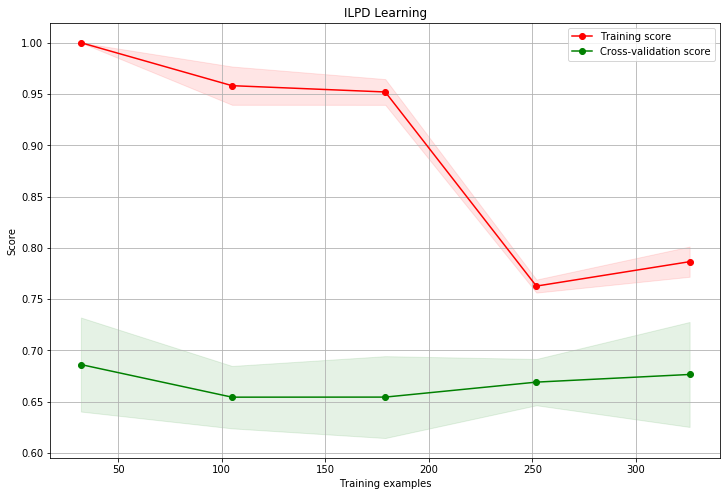

In [37]:
plot_learning_curve(mlp,"ILPD Learning", new_X_train, y_train)

In [38]:
print("Training set score: %f" % mlp.score(new_X_train, y_train))
print("Test set score: %f" % mlp.score(new_X_test, y_test))

Training set score: 0.745098
Test set score: 0.680000
